In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Chuẩn bị dữ liệu

In [2]:
df_spotify = pd.read_csv('./Spotify-dataset/dataset.csv')
df_spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df_spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### 2. Tiền xử lí

In [4]:
from sklearn.preprocessing import StandardScaler

X = df_spotify[['energy', 'valence', 'tempo']]
y = df_spotify['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. Giảm chiều bằng t-SNE

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### 4. Linear Regression với dữ liệu t-SNE

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

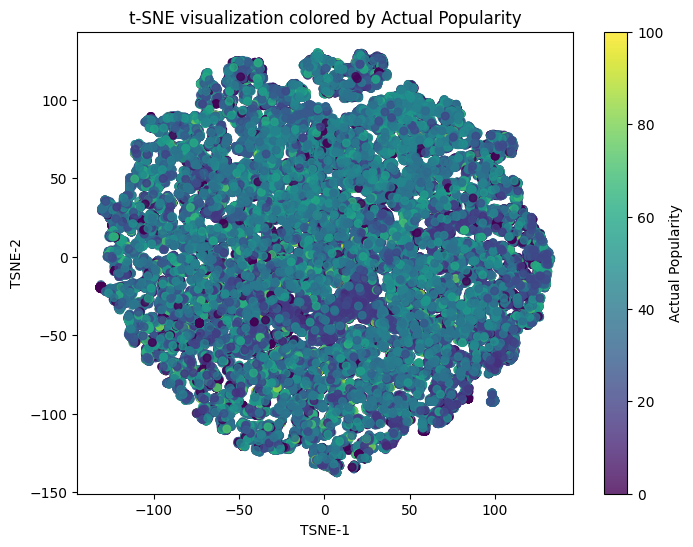

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=30, alpha=0.8)
plt.colorbar(label='Actual Popularity')
plt.title('t-SNE visualization colored by Actual Popularity')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

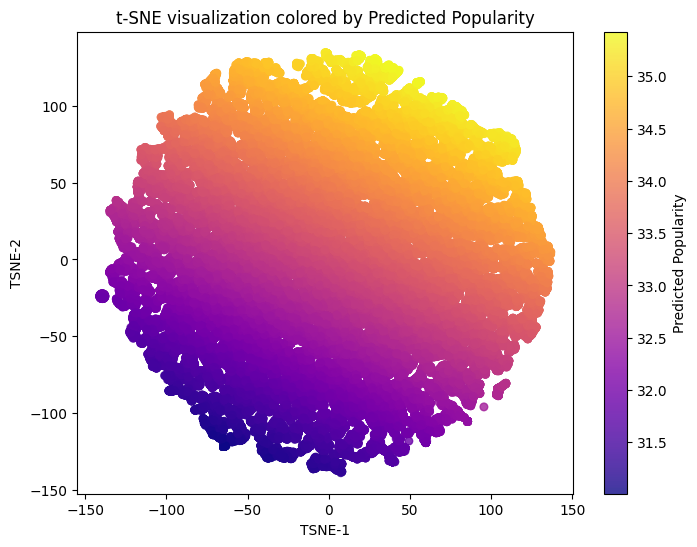

In [28]:
y_all_pred = model.predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_all_pred, cmap='plasma', s=30, alpha=0.8)
plt.colorbar(label='Predicted Popularity')
plt.title('t-SNE visualization colored by Predicted Popularity')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

In [1]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, label='t-SNE + Linear Regression')

plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction')

plt.title('True vs Predicted Popularity (t-SNE + Linear Regression)')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined